




学习使用sklearn的线性拟合（LinearRegression）以及MSE
该程序使用了PolynomialFeatures(D,include_bias=False)进行非线性数据的预处理，生成数据feature（x）的一次方到D次方

example 1



Scientists have modelled how 1000 COVID-19 infected cases would increase under different infection rates. Reported  number of infected  cases in a certain city is given below: 
    
    day=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60] 

    infected_cases=[1000, 1524, 3131, 3600, 6751, 7318, 8945, 7514, 9890, 8634, 14925, 18729, 27710]


In order to find the least square polynomial (curvy line) fit of the data, say we can use the model y￼ +￼x1+ ￼2 where x1 is the day and y is the number of cases. 

    Calculate the coefficients ￼ and ￼that minimize the MSE  on the given data
    Calculate the training MSE

    Given validation data set  day=[8, 28, 37, 46, 54, 62]  

    actual infected_cases=[2450, 8002, 9300, 17301, 20320, 27611],calculate validation MSE. 
    
    You can use PolynomialFeatures  class from Scikit-Learn.

Coefficients: [-67.25884116   6.89088911]
Intercept: 2609.6153846153875


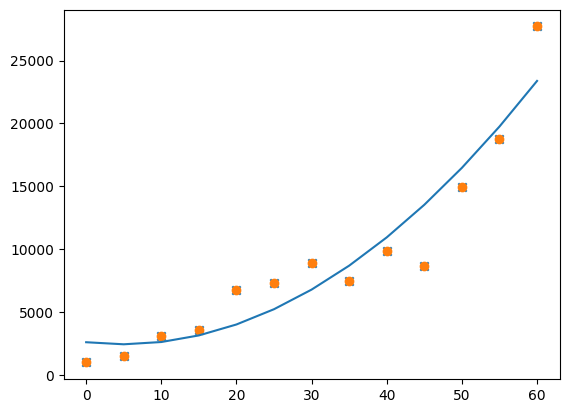

Validation MSE is 3766799.20


In [5]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error #MSE

from sklearn.preprocessing import PolynomialFeatures # to transform to  polynomial features


day_list=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60] 
infected_list=[1000, 1524, 3131, 3600, 6751, 7318, 8945, 7514, 9890, 8634, 14925, 18729, 27710] 
plt.scatter(day_list,infected_list, marker='x')


# making dictionary and data frame for training 
data={'day': day_list, 'infected case': infected_list}
df = pd.DataFrame(data, columns=['day', 'infected case'])



X_train=df[['day']] # INPUT Feature (time) 
y_train=df['infected case'] # Actual output (height)
plt.scatter(X_train,y_train)



D=2# degree of polynomial
poly = PolynomialFeatures(D, include_bias=False) # making polynomial features with Degree D=2
X_train_poly=poly.fit_transform(X_train) # Making features, x1, x1^2, x1^3, x1^4...x1^D 

# Create and train the Linear Regression model
my_model = LinearRegression()
my_model.fit(X_train_poly, y_train) # training model using Xtrain and ytrain

# one intercept (wo) and D coeffs (w1, w2,....WD) for polynomial terms 
print(f'Coefficients: {my_model.coef_}') # priting trained/optimal coeffs of polynomial terms
print(f'Intercept: {my_model.intercept_}') # trained/optimal wo

# Calculation of training MSE
y_pred_train=my_model.predict(X_train_poly) # making prediction using transformed features of training data set
mse_poly_train = mean_squared_error(y_train, y_pred_train) # MSE calculation for training data set

plt.plot(day_list,y_pred_train)

plt.show()

# Validation data set

day_list=[8,28,37,46,54,62]
infected_list=[2450,8002,9300,17301,20320,27611] 

val_data={'day': day_list, 'infected case': infected_list}
df = pd.DataFrame(val_data, columns=['day', 'infected case'])


X_val=df[['day']] # INPUT Feature (time) 
y_val=df['infected case'] # Actual output (height)

X_val_poly=poly.fit_transform(X_val) 

y_pred_val = my_model.predict(X_val_poly) 

val_mse_poly = mean_squared_error(y_pred_val, y_val) # MSE calculation

    

print(f"Validation MSE is {val_mse_poly:.2f}")

example 2 - model validation

Say you were given with P=2000 data points.  You used regression to model the relationship between input and output. At first, you used linear regression. Assume the parameters that minimize mean square error (MSE) for this regression are w0=5 and w1=1.5.   Then you used polynomial regression and assume the parameters for this polynomial regression are w0=2, w1=0.5 and w2=0.01 that minimize MSE. You are also given 4 test data points (usually there are more test data points) to compare your models’ results in the following table.

Calculate validation errors i.e., MSE for the given test data set for both of your regression models (linear vs polynomial ones). 

Compare your models’ validation errors and make a conclusion which one of these models is more appropriate for your regression problem. 


example 3 - model selection

Consider that a ball is thrown vertically towards the sky at velocity u=10 m/sec at time t=0. The ball will go up and then starts to fall. The height, h  (in meter) of the ball is measured over time, t (in sec). The recorded time and height data is posted in canvas (“projectile_motion_data.csv”). You want to fit this data using a regression model. You need to select the degree of polynomial, D . You can use 20% data for validating your model.

Q-1: Calculate the parameters of polynomial regression (assume degree D=2) that minimize MSE. You can use scikit-learn “PolynomialFeature” and LinearRegression to fit a polynomial model to the data.  

Q-2: Repeat Q-1 for different  order of polynomials (D=1,3,4,5,6,7,8,9, and 10).  


,Time,Height,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,0.0,0.352810,NaN,NaN,NaN,NaN,NaN
1,0.1,1.031031,NaN,NaN,NaN,NaN,NaN
2,0.2,1.999748,NaN,NaN,NaN,NaN,NaN
3,0.3,3.007179,NaN,NaN,NaN,NaN,NaN
4,0.4,3.589512,NaN,NaN,NaN,NaN,NaN
5,0.5,3.579544,NaN,NaN,NaN,NaN,NaN
6,0.6,4.426018,NaN,NaN,NaN,NaN,NaN
7,0.7,4.568729,NaN,NaN,P=20,NaN,NaN
8,0.8,4.843356,NaN,NaN,Training,80%,16 data points are selected randomly
9,0.9,5.113120,NaN,NaN,Validation,20%,Remaining 4 data points will be used for valid...


Coefficients: [-0.31052581]
Intercept: 4.243690528963353
Coefficients: [ 9.76908536 -4.84188768]
Intercept: 0.26925357228104874
Validation MSE for D=2 is 0.01
Coefficients: [ 7.56849395 -2.36858635 -0.78513084]
Intercept: 0.7712234379945513
Validation MSE for D=3 is 0.11
Coefficients: [10.12223256 -7.19967482  2.69641908 -0.83966422]
Intercept: 0.3655925495802772
Validation MSE for D=4 is 0.04
Coefficients: [ 11.97182247 -12.16846656   8.49339234  -3.87642306   0.58483117]
Intercept: 0.13703183799014695
Validation MSE for D=5 is 0.03
Coefficients: [  38.47401857 -105.06835818  161.43759455 -131.76639958   53.09385353
   -8.39418313]
Intercept: -2.5564121545421563
Validation MSE for D=6 is 2.24
Coefficients: [  74.5096216  -260.62451926  494.73758622 -521.75393414  306.18195367
  -93.80237308   11.67840324]
Intercept: -5.690473233145479
Validation MSE for D=7 is 9.66
Coefficients: [  60.07564464 -186.89723032  300.01725498 -226.91523618   40.85964753
   46.22666121  -28.29645742    4.76

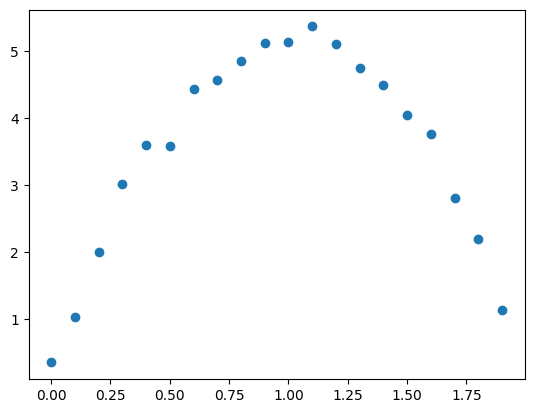

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split # we have to split data set into training and testing 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error #MSE
import matplotlib.pyplot as  plt 
import numpy as np
from sklearn.preprocessing import PolynomialFeatures # to create polynomial features
data=pd.read_csv('projectile_motion_data.csv') # Created a data frame by reading from csv file 
display(data)
X=data[['Time']] # INPUT Feature (time) 
y=data['Height'] # Actual output (height)
plt.scatter(X,y)


# Split into training and validation sets 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42) # random_state =starting state. you will have same test/training set for each run

my_linear_model = LinearRegression()
my_linear_model.fit(X_train, y_train) # training model usign Xtrain and ytrain

print(f'Coefficients: {my_linear_model.coef_}') # priting trained/optimal coeffs of polynomial terms
print(f'Intercept: {my_linear_model.intercept_}') # trained/optimal wo

#print(y_test)
# Calculating for various D 
for D  in [2,3,4,5,6,7,8,9,10]:
    poly = PolynomialFeatures(D, include_bias=False) # making polynomial features with Degree D=2
    X_train_poly=poly.fit_transform(X_train) # Making new columns x^2, x^3, x^4...x^D 
    
        # Create and train the Linear Regression model
    my_model = LinearRegression()
    my_model.fit(X_train_poly, y_train) # training model usign Xtrain and ytrain
    # one intercept (wo) and D coeffs (w1, w2,....WD) for polynomial terms 
    print(f'Coefficients: {my_model.coef_}') # priting trained/optimal coeffs of polynomial terms
    print(f'Intercept: {my_model.intercept_}') # trained/optimal wo

#   y_pred_train = my_model.predict(X_train_poly) # Trained model will make prediction for test inputs (X_test) 
  #  mse_poly_train = mean_squared_error(y_train, y_pred_train) # MSE calculation

# Predictions and evaluation
    X_val_poly=poly.fit_transform(X_val) # Making new columns x^2, x^3, x^4...x^D 
    y_pred = my_model.predict(X_val_poly) # Trained model will make prediction for test inputs (X_test) 
    mse_poly = mean_squared_error(y_val, y_pred) # MSE calculation
    print(f"Validation MSE for D={D} is {mse_poly:.2f}")